📊 Final Assessment: Telco Customer Analysis Project
🧾 Objective
This notebook walks through a full data science pipeline on the Telco Customer Churn dataset, covering regression, classification, and unsupervised learning tasks - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

🧾 Deliverables
A full data science pipeline showing:

EDA

Feature Engineering (if applicable)

Model building - Regression, Classification and Unsupervised learning task (Clustering)

A section on business insights and recommendations based on analysis

A github link to the project

🚨Deadline
Thursday 10th July, 2025, Time: 10pm

**1️⃣ Importing Libraries**

In [3]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

**2️⃣ Load the Dataset**

In [4]:
#load data

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**3️⃣ Data Cleaning & Preprocessing
Check missing values and data types
Encode categorical variables
Scale numeric features**

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Changing the data type of TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.dropna(subset=['TotalCharges'])

df['TotalCharges'] = df['TotalCharges'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

/tmp/ipython-input-7-3817904709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [8]:
#checking for duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
#checking for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
#checking for statistical explanation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
#dropping customer ID
df.drop(['customerID'], axis = 1, inplace = True)

In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
#separating cat and num cols
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(f"The categorical columns are: {cat_cols}")
print(f"The numerical columns are: {num_cols}")

The categorical columns are: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
The numerical columns are: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


**4️⃣ Exploratory Data Analysis (EDA)**

**Summary statistics**

**Visualize churn distribution**

**Correlation heatmap**

**Histograms and boxplots**

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# creating a for loop that shows the unique object in the categorical features.
for col in cat_cols:
  print(f"{col}: {df[col].nunique()} unique features")
  print(f"{col}: {df[col].unique()} \n")

gender: 2 unique features
gender: ['Female' 'Male'] 

Partner: 2 unique features
Partner: ['Yes' 'No'] 

Dependents: 2 unique features
Dependents: ['No' 'Yes'] 

PhoneService: 2 unique features
PhoneService: ['No' 'Yes'] 

MultipleLines: 3 unique features
MultipleLines: ['No phone service' 'No' 'Yes'] 

InternetService: 3 unique features
InternetService: ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity: 3 unique features
OnlineSecurity: ['No' 'Yes' 'No internet service'] 

OnlineBackup: 3 unique features
OnlineBackup: ['Yes' 'No' 'No internet service'] 

DeviceProtection: 3 unique features
DeviceProtection: ['No' 'Yes' 'No internet service'] 

TechSupport: 3 unique features
TechSupport: ['No' 'Yes' 'No internet service'] 

StreamingTV: 3 unique features
StreamingTV: ['No' 'Yes' 'No internet service'] 

StreamingMovies: 3 unique features
StreamingMovies: ['No' 'Yes' 'No internet service'] 

Contract: 3 unique features
Contract: ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling: 2 u

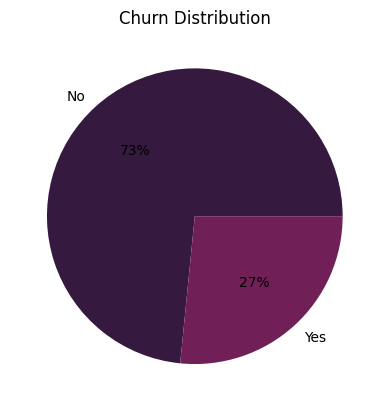

In [18]:
#visualising



#target variable -> Churn
Churn = dict(df["Churn"].value_counts())
palette = sns.color_palette("rocket")
plt.pie(Churn.values(), labels=Churn.keys(), colors = palette, autopct = "%.0f%%")
plt.title("Churn Distribution")
plt.show();

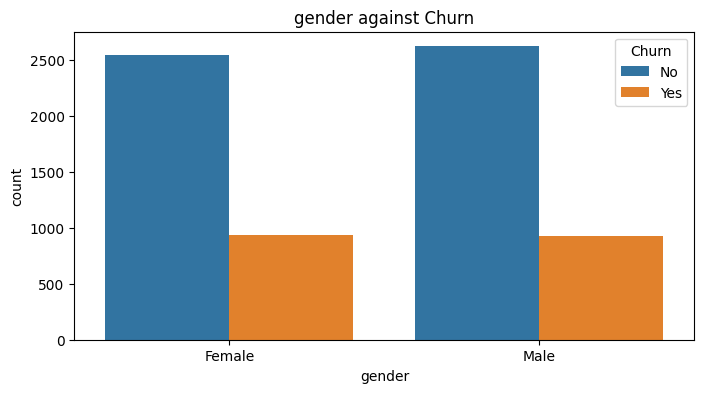

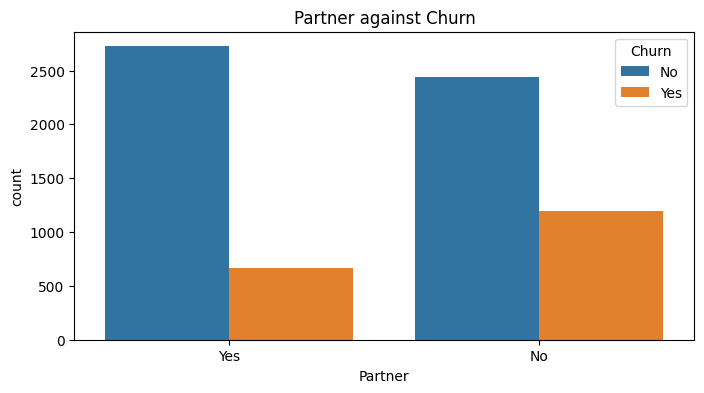

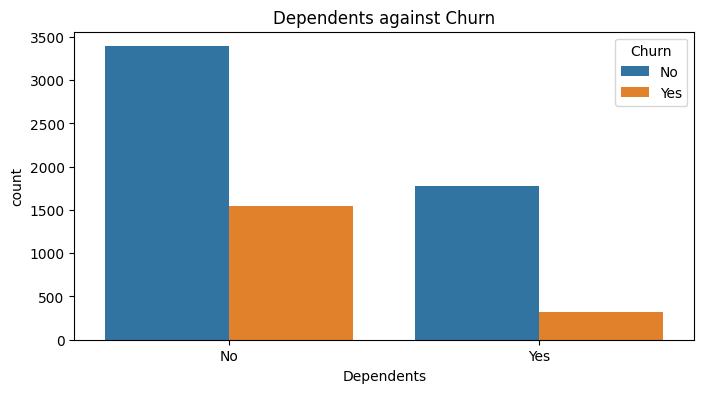

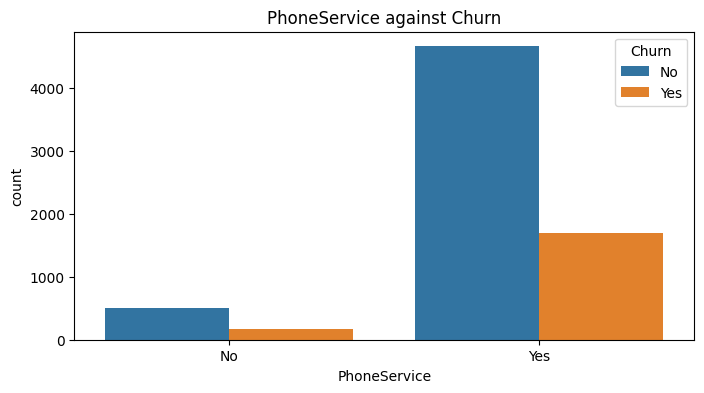

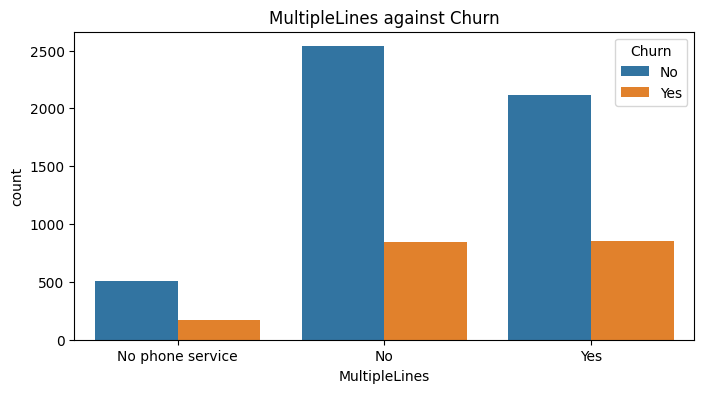

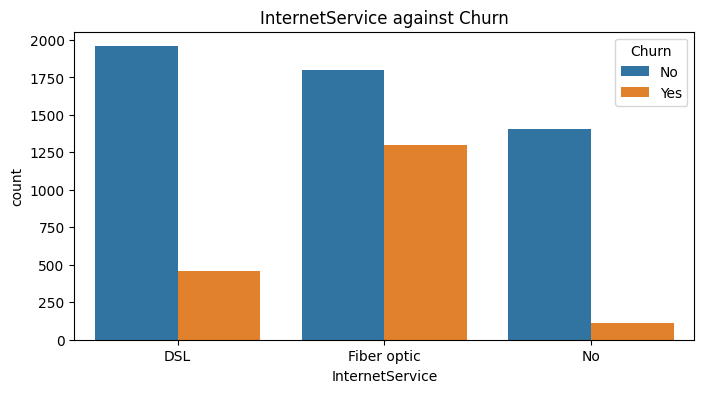

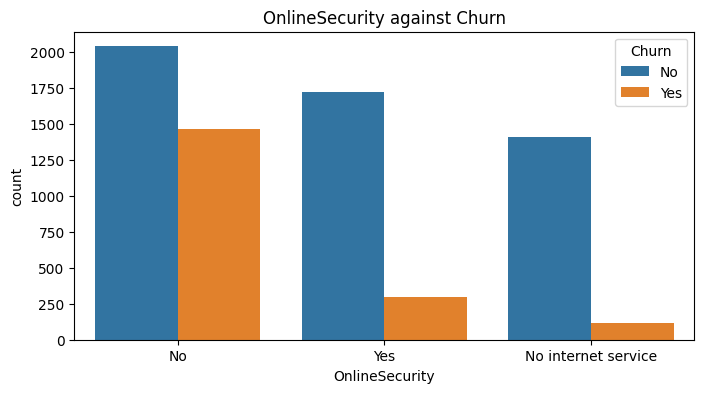

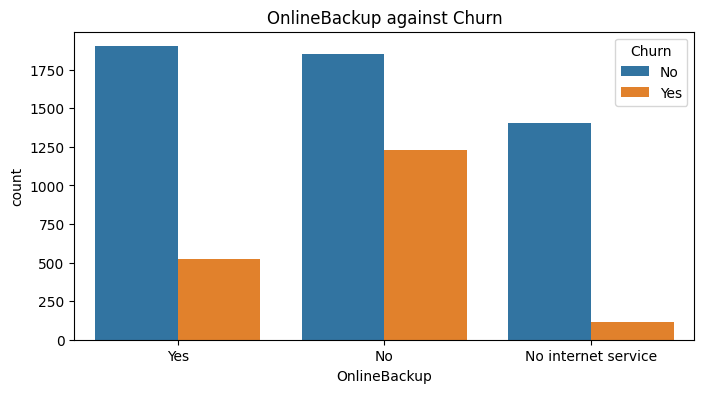

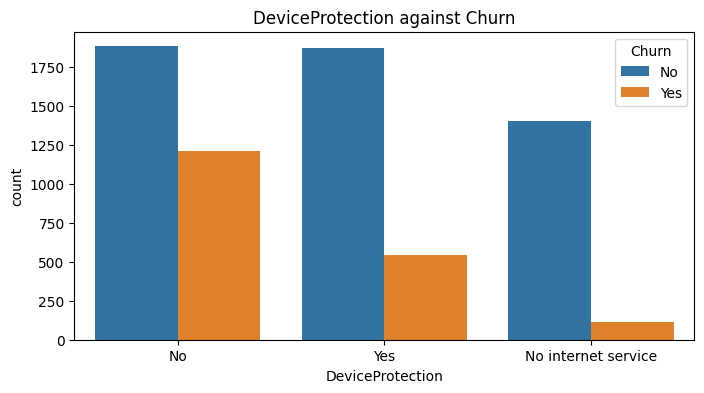

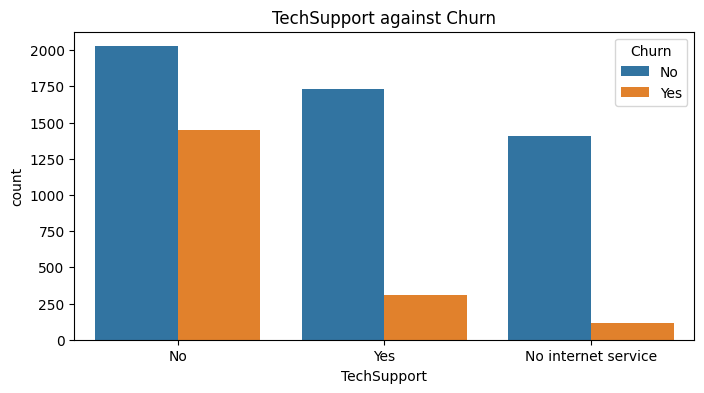

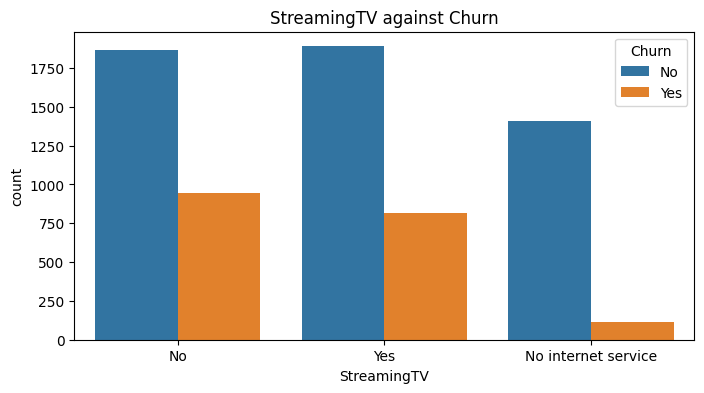

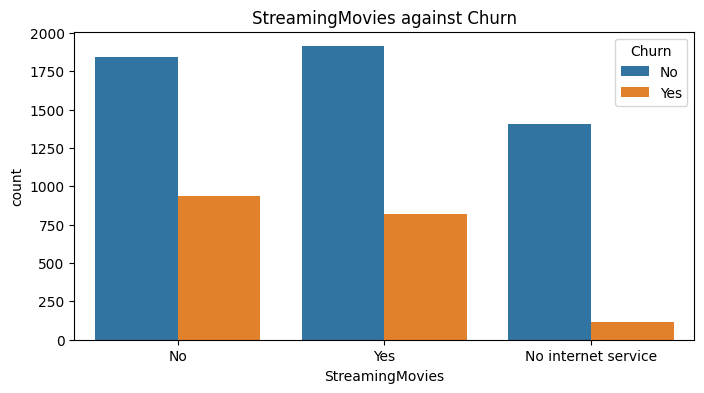

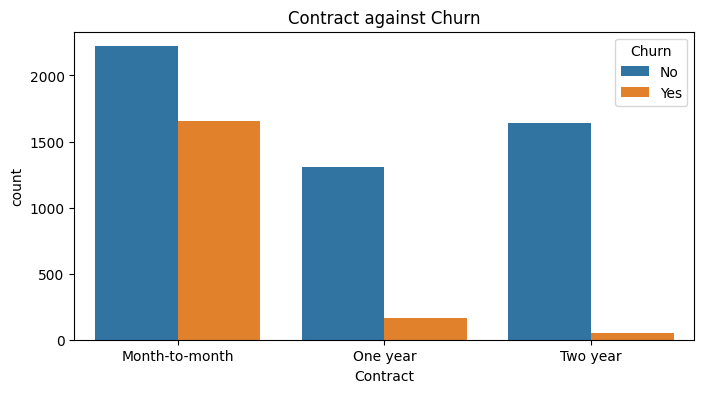

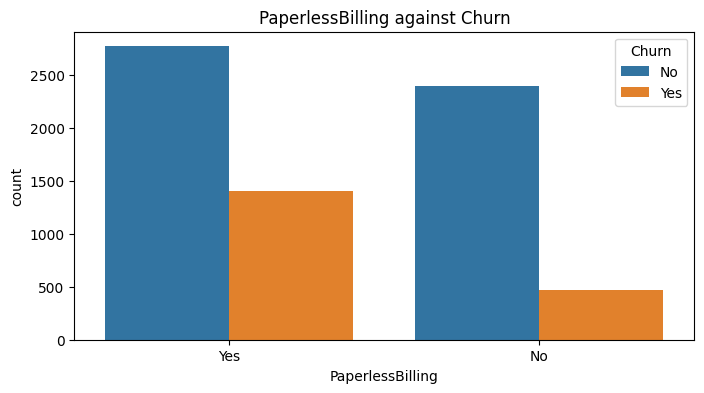

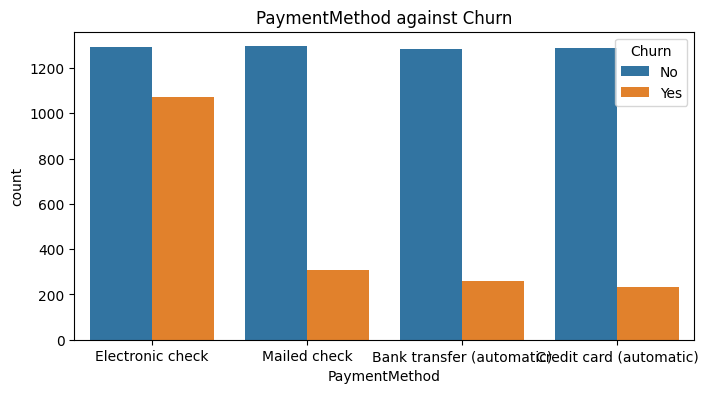

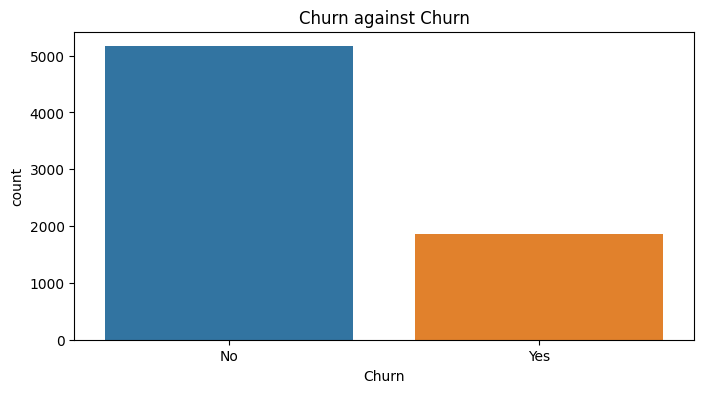

In [19]:
#plotting the cat_col against churn to see what i'm dealing with.

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} against Churn')
    plt.show()

from the plot i can deduce that some services like fiber optic for internet service, month-to-month for contract, electronic check for payment method seems to show very strong churn risk

In [20]:

#visualizing PaymentMethod
PaymentMethod = df["PaymentMethod"].value_counts().reset_index()
PaymentMethod.columns = ["PaymentMethod", "count"]
fig = px.pie(PaymentMethod, names = "PaymentMethod", values = "count", hole = 0.3,
             title = "Distribution of PaymentMethod")

fig.update_traces(textinfo = "percent+label", pull = 0.05)
fig.show();

In [21]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [22]:
#multivariate analysis for num_cols
# tenure, monthlycharges, totalcharges.

fig = px.scatter_3d(
    df,
    x = "tenure",
    y = "MonthlyCharges",
    z = "TotalCharges",
    color = "Churn",
    color_discrete_map= {"Yes": "blue", "No":"red"},
    title = "Senior Citizen, Tenure, Monthly Charges and Total Charges against Churn"
)

fig.show();

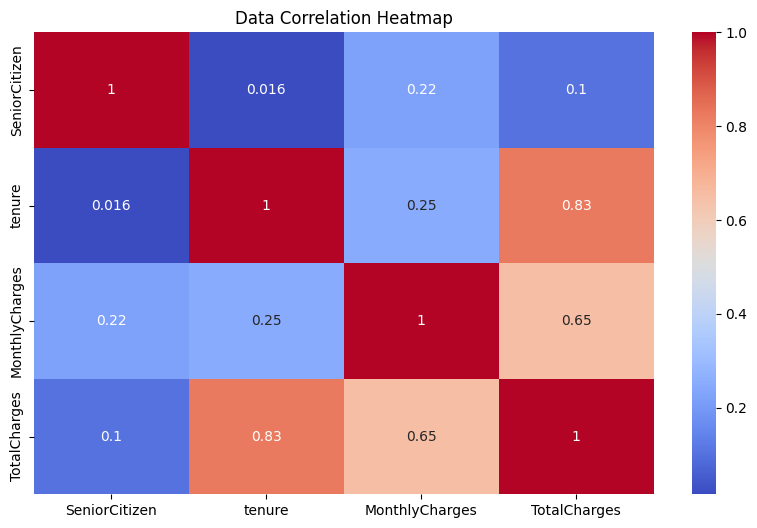

In [23]:
#correlation heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm")
plt.title("Data Correlation Heatmap")
plt.show();

there is a significant correlation between tenure and totalcharges, it shows that as the tenure increases the totalcharges probably increases with time

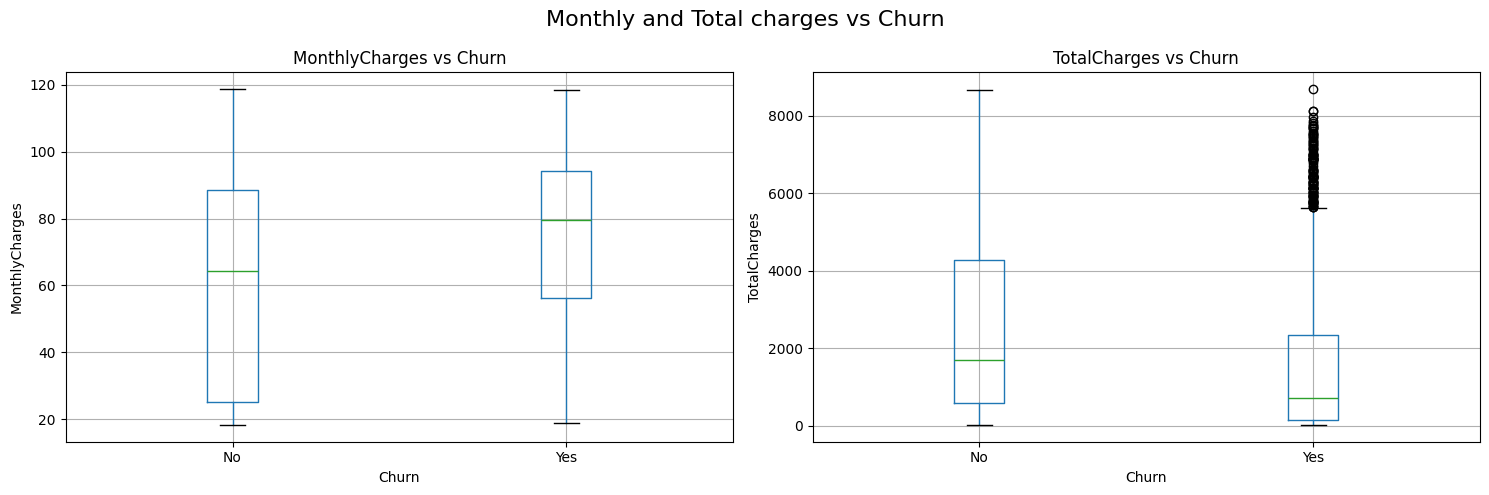

In [24]:
numerical_features = ['MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for idx, feature in enumerate(numerical_features):
    df.boxplot(column=feature, by='Churn', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feature)
plt.suptitle('Monthly and Total charges vs Churn', fontsize=16)
plt.tight_layout()
plt.show()

for the montlycharges box plot.
it shows that customers that tend to leave have higher monthly charges compared to the customers that are likely to stay.

for total charge box plot
the customers that tend to stay have higher total charge while the one that tend to leave have lower total charge.
We can deduce that higher monthly charge can pose risk to why customers leave.

**5️⃣ Regression Task: Predict Monthly Charges
Target: MonthlyCharges
Evaluation: MAE, RMSE, R²**

**ENCODING AND SCALING FIRST**

In [25]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [26]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
#encoding and standardizing my data

In [28]:
#separating the two value counts from the multiple value count in the cat_col
two_value_cols = [col for col in cat_cols if df[col].nunique() == 2]

In [29]:
two_value_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [30]:
#using label encounder for the two_value_counts in cat_cols

label_encoder = LabelEncoder()
for col in two_value_cols:
    df[col] = label_encoder.fit_transform(df[col])



In [31]:
#removing the two_value_count in cat_col
cat_cols.remove('gender')
cat_cols.remove('Partner')
cat_cols.remove('Dependents')
cat_cols.remove('PhoneService')
cat_cols.remove('PaperlessBilling')
cat_cols.remove('Churn')

In [32]:
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [33]:
#encoding the remaining cat_cols
df = pd.get_dummies(df, drop_first = True)

In [34]:
#encoding the num_cols
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False


In [35]:
df.shape

(7032, 31)

**BUILDING THE REGRESSION TASK**

In [36]:
#Target variable --- MonthlyCharges
#dependent and independent variable


X = df.drop("MonthlyCharges", axis = 1) #would only contain independent features(use for predicting the target)
y = df["MonthlyCharges"] #target variable

print(X.shape)


(7032, 30)


In [37]:
# using train test split for test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 30)
(1407, 30)
(5625,)
(1407,)


In [38]:
#training model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [39]:
#make predictions on just the test independent variables
y_preds = model.predict(X_test)

In [40]:
y_preds

array([-1.32657169, -1.32174043,  1.16367558, ..., -0.32740987,
        1.66491176, -1.32770499])

In [41]:
y_test

,MonthlyCharges
2481,-1.322910
6784,-1.332882
6125,1.244914
3052,-0.324035
4099,-1.174990
...,...
1733,-1.520691
5250,0.988963
5465,-0.290794
5851,1.529120


In [42]:
#evaluation using MAE and R2 score
mae = mean_absolute_error(y_test, y_preds)
print(f"Mean Absolute Error for Linear Regression Model: {mae}")

r2 = r2_score(y_test, y_preds)
print(f"R-squared for Linear Regression Model: {r2}")

Mean Absolute Error for Linear Regression Model: 0.02605674142668097
R-squared for Linear Regression Model: 0.9987826617092588


In [43]:
model_2 = RandomForestRegressor(random_state = 42)

#fit the model
model_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
#predictions
y_preds_2 = model_2.predict(X_test)

In [45]:
#evaluation
mae_2 = mean_absolute_error(y_test, y_preds_2)
print(f"MAE for RandomForestRegressor Model: {mae_2}")

r2_ = r2_score(y_test, y_preds_2)
print(f"R-squared for RFR: {r2_}")

MAE for RandomForestRegressor Model: 0.03039296351282224
R-squared for RFR: 0.9981249448473992


In [46]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error for Linear Regression Model: {rmse}")

Root Mean Squared Error for Linear Regression Model: 0.03447805596231436


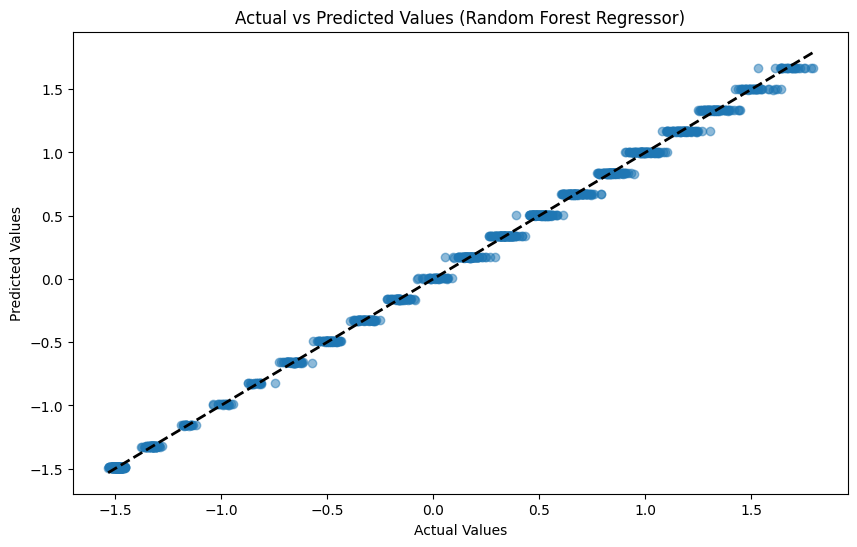

In [47]:
#visualize predictions and also the actual values
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_preds, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw = 2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regressor)")
plt.show();

In [48]:
#comparing models
print("--- Regression Model Comparison ---")
print(f"Linear Regression - MAE: {mae:.4f}, R²: {r2:.4f}, RMSE: {rmse:.4f}")
print(f"Random Forest Regressor - MAE: {mae_2:.4f}, R²: {r2_:.4f}")

--- Regression Model Comparison ---
Linear Regression - MAE: 0.0261, R²: 0.9988, RMSE: 0.0345
Random Forest Regressor - MAE: 0.0304, R²: 0.9981


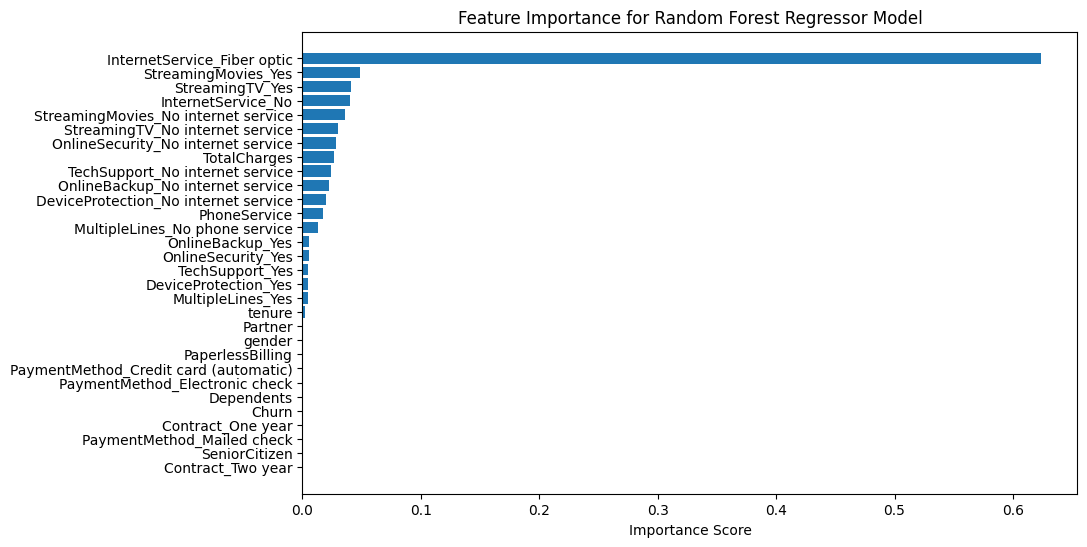

In [49]:
feat_importance = model_2.feature_importances_
names = X.columns

#visualization
sorted = feat_importance.argsort()[::-1]
plt.figure(figsize = (10, 6))
plt.barh(names[sorted], feat_importance[sorted])
plt.title("Feature Importance for Random Forest Regressor Model")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show();

Conclusion from Regression Model --best model Random Forest Regressor Model

The model was able to predict the monthly charges with a reasonable accuracy with a good score

Insights:

 telco Business will understand the factors that contribute to higher or lower monthlyCharges so as to review its price strategy,

 Accurate prediction of the monthly charges will help telco to estimate future sales

 telco will be able to know the customer group that will likely have a higher monthly charge



In [50]:
#saving model
import joblib

#save the trained model
joblib.dump(model, "Linear_Regression_model.pkl")
print("saved to part")

saved to part


**6️⃣ Classification Task: Predict Churn**

**Target: Churn**

**Use Logistic Regression & Random Forest**

**Evaluation: Confusion Matrix, F1 Score, ROC-AUC**

In [51]:
#Target variable --- Churn
#dependent and independent variable


X = df.drop("Churn", axis = 1)
y = df["Churn"] #target variable

print(X.shape)

(7032, 30)


In [52]:
#train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 30)
(1407, 30)
(5625,)
(1407,)


Checking for class inbalance

In [53]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [54]:
from imblearn.over_sampling import SMOTE
#imbalance handling
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [55]:
y_train.value_counts()

,count
Churn,
0,4130
1,4130


In [56]:
# training logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [57]:
# making prediction
log_pred = logreg.predict(X_test)

In [58]:
# evaluating
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.50      0.70      0.58       374

    accuracy                           0.73      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.73      0.74      1407



In [59]:
roc_auc = roc_auc_score(y_test, log_pred)

print(f"ROC_AUC score: {roc_auc}")

ROC_AUC score: 0.7218850137960666


In [60]:
# confusion matrix
confusion_matrix(y_test, log_pred)

array([[765, 268],
       [111, 263]])

In [61]:
# random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# making prediction
rf_pred = rf_model.predict(X_test)

In [63]:
# evaluating
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [64]:
roc_auc = roc_auc_score(y_test, rf_pred)

print(f"ROC_AUC score: {roc_auc}")

ROC_AUC score: 0.7282912548985097


In [65]:
# confusion matrix
confusion_matrix(y_test, rf_pred)

array([[839, 194],
       [133, 241]])

In [66]:
#hyperparameter tuning -
from sklearn.model_selection import GridSearchCV

#define parameter
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 6]
}

#set up grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 5, scoring = "r2")

#fit model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [67]:
#best model
best_model = grid_search.best_estimator_
Y_preds_grid = best_model.predict(X_test)

In [68]:
# evaluating
print(classification_report(y_test, Y_preds_grid))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.56      0.66      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407



In [69]:
# confusion matrix
confusion_matrix(y_test, Y_preds_grid)

array([[840, 193],
       [128, 246]])

In [70]:
roc_auc = roc_auc_score(y_test, Y_preds_grid)

print(f"ROC_AUC score: {roc_auc}")

ROC_AUC score: 0.7354597739826372


In [71]:
# Decision Tree Modeling


dectree = DecisionTreeClassifier(random_state=100)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [72]:
# making prediction
dectree_pred = dectree.predict(X_test)

In [73]:
# evaluating
print(classification_report(y_test, dectree_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1033
           1       0.49      0.60      0.54       374

    accuracy                           0.72      1407
   macro avg       0.66      0.68      0.67      1407
weighted avg       0.75      0.72      0.73      1407



In [74]:
# confusion matrix
confusion_matrix(y_test, dectree_pred)

array([[797, 236],
       [151, 223]])

In [75]:
roc_auc = roc_auc_score(y_test, dectree_pred)

print(f"ROC_AUC score: {roc_auc}")

ROC_AUC score: 0.6838979453437628


In [76]:
#model  -> lgbclassifier
lgb = LGBMClassifier(n_estimators=80, max_depth = 8, random_state = 42)

lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=8, n_estimators=80, random_state=42)

In [77]:
#predictions -> lgb
lgb_preds = lgb.predict(X_test)

#evaluation
print(classification_report(y_test, lgb_preds))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



In [78]:
roc_auc = roc_auc_score(y_test, lgb_preds)

print(f"ROC_AUC score: {roc_auc}")

ROC_AUC score: 0.7323718363522475


In [79]:
# comparing all of my models


print("\n---Classification Model Comparison---")

print("Logistic Regression:")
print(classification_report(y_test, log_pred))
print(f"ROC-AUC score: {roc_auc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))

print("\nRandom Forest Classifier (first classifier):")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print("\nRandom Forest Classifier (Grid):")
print(classification_report(y_test, Y_preds_grid))
print(f"ROC-AUC score: {roc_auc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_preds_grid))

print("\nDecision Tree Classifier:")
print(classification_report(y_test, dectree_pred))
print(f"ROC-AUC score: {roc_auc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, dectree_pred))

print("\nLightGBM Classifier:")
print(classification_report(y_test, lgb_preds))
print(f"ROC-AUC score: {roc_auc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_preds))


---Classification Model Comparison---
Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.50      0.70      0.58       374

    accuracy                           0.73      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.73      0.74      1407

ROC-AUC score: 0.7324
Confusion Matrix:
 [[765 268]
 [111 263]]

Random Forest Classifier (first classifier):
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407

Confusion Matrix:
 [[839 194]
 [133 241]]

Random Forest Classifier (Grid):
              precision    recall  f1-score   support

           0       0.87      0.81      0.84  

Based on ROC-AUC and F1-score for the positive class (Churn=Yes), the best performing model is: Random Forest Classifer (Grid)

The selected best model object is:  Random Forest Classifer (Grid)

From the Random Forest classifier (Grid) confusion matrix:

True Negatives (840): Customers correctly predicted to stay.

False Positives (193): Customers incorrectly predicted to churn.

False Negatives (128): Churned customers missed by the model.

True Positives (246): Customers correctly identified as likely to churn.



By using this predictive model into the customer management process, companies can:

Identify at-risk customers early

Offer personalized incentives or support

Reduce churn rates

Improve long-term revenue and customer loyalty

**7️⃣ Clustering Task: Segment Customers
Use KMeans
Apply PCA for visualization
Evaluate with Silhouette Score**

In [80]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [81]:
features =df[['tenure', 'MonthlyCharges', 'TotalCharges']]
features

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7038,-0.343137,0.664868,-0.129180
7039,1.612573,1.276493,2.241056
7040,-0.872808,-1.170004,-0.854514
7041,-1.158016,0.319168,-0.872095


In [82]:
#standardize the columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [83]:
X_scaled

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [84]:
# Elbow method to determine optimal k
inertia = []
K = range(1, 11) # -> 1,2,3,4,5,6,7,8,9,10
for k in K:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

inertia

[21096.00000000011,
 9700.829985495973,
 6599.167049027572,
 4144.663423085733,
 3109.638327803292,
 2790.6724084735397,
 2251.1020929365272,
 1940.5485014630096,
 1638.830377666749,
 1418.646648074548]

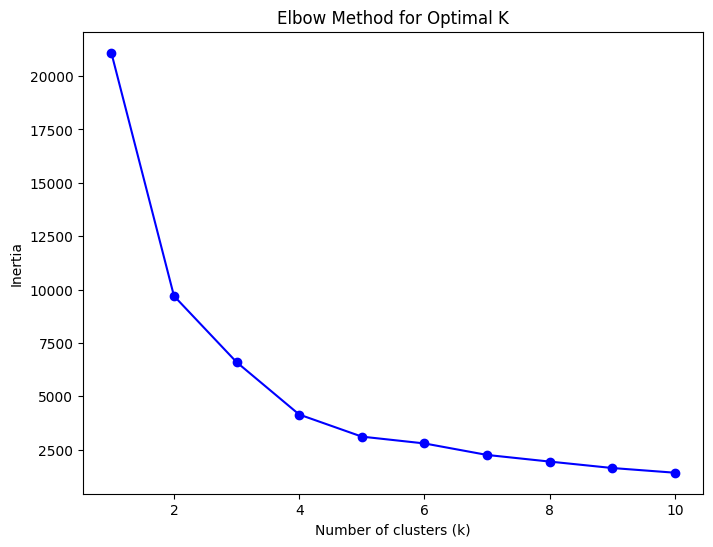

In [85]:
#plotting the elbow method
plt.figure(figsize = (8,6))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show();

In [86]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k={k} → Silhouette Score: {score:.2f}')

k=2 → Silhouette Score: 0.48
k=3 → Silhouette Score: 0.43
k=4 → Silhouette Score: 0.47
k=5 → Silhouette Score: 0.44
k=6 → Silhouette Score: 0.42
k=7 → Silhouette Score: 0.42
k=8 → Silhouette Score: 0.41
k=9 → Silhouette Score: 0.42
k=10 → Silhouette Score: 0.43


In [87]:
#fit KMeans with optimal k -> 3 clusters
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

In [88]:
clusters

array([1, 2, 1, ..., 1, 3, 0], dtype=int32)

In [89]:
df["KMeans_Cluster"] = clusters
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,KMeans_Cluster
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,True,False,1
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,True,False,False,False,True,2
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,True,1
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,False,False,False,False,True,False,False,False,False,2
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,True,False,3


In [90]:
df["KMeans_Cluster"].value_counts()

,count
KMeans_Cluster,
3,2269
0,1915
1,1695
2,1153


In [91]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'KMeans_Cluster'],
      dtype='object')

In [92]:
features

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7038,-0.343137,0.664868,-0.129180
7039,1.612573,1.276493,2.241056
7040,-0.872808,-1.170004,-0.854514
7041,-1.158016,0.319168,-0.872095


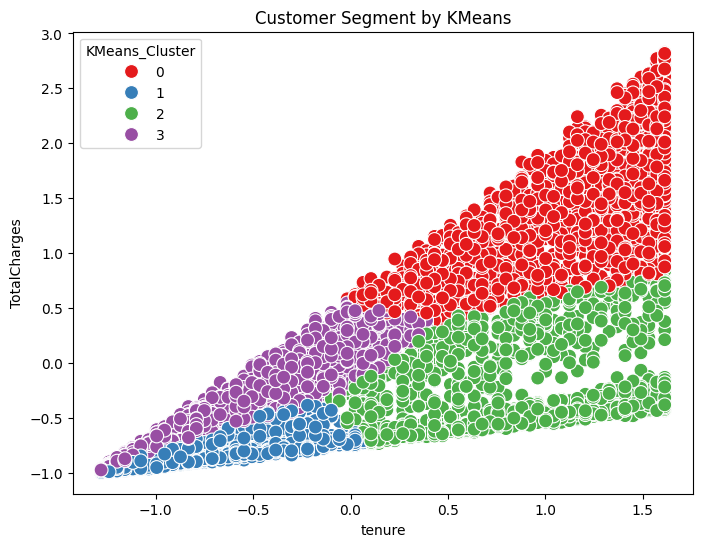

In [93]:
#scatter plot
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = "tenure",
                y = "TotalCharges", hue = "KMeans_Cluster", palette = "Set1", s = 100)
plt.title("Customer Segment by KMeans")
plt.show();

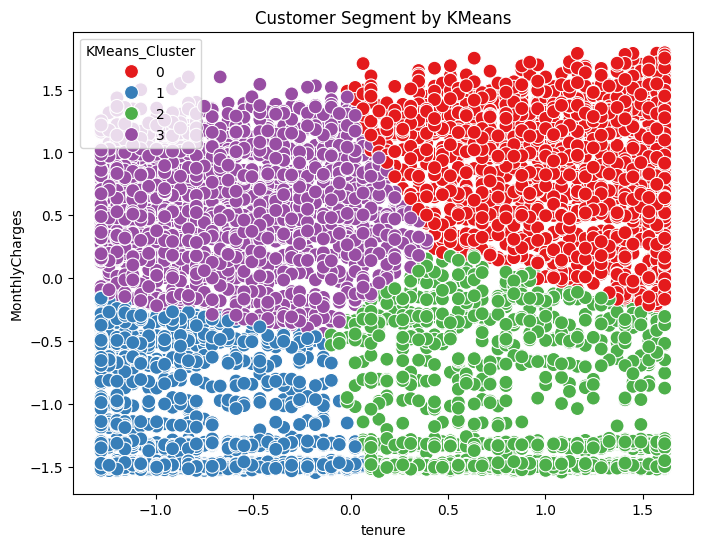

In [94]:
#scatter plot
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = "tenure",
                y = "MonthlyCharges", hue = "KMeans_Cluster", palette = "Set1", s = 100)
plt.title("Customer Segment by KMeans")
plt.show();

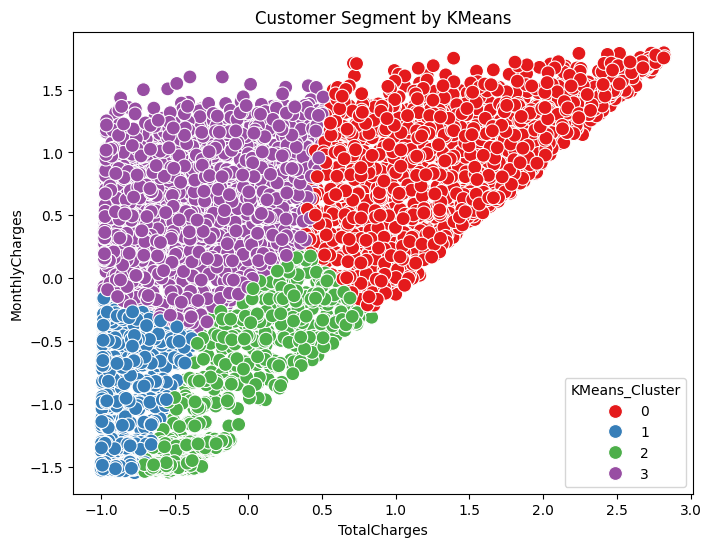

In [95]:
#scatter plot
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = "TotalCharges",
                y = "MonthlyCharges", hue = "KMeans_Cluster", palette = "Set1", s = 100)
plt.title("Customer Segment by KMeans")
plt.show();

In [96]:
#sihoulette score
score  = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score: .2f}")

Silhouette Score:  0.47


In [97]:
#PCA Application
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [98]:
X_pca

array([[-1.95165689, -0.08275258],
       [-0.20579255, -0.23514165],
       [-1.51808264,  0.52254219],
       ...,
       [-1.63168822, -0.34516629],
       [-1.08184347,  1.00900265],
       [ 2.77397648,  0.12278947]])

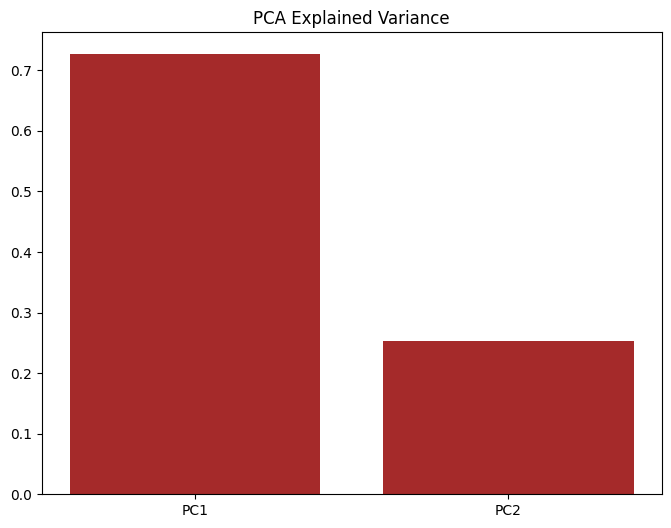

In [99]:
#visualize our pca
plt.figure(figsize = (8, 6))
plt.bar(["PC1", "PC2"], pca.explained_variance_ratio_, color = "brown")
plt.title("PCA Explained Variance")
plt.show();

In [100]:
#sum of the variance
pca.explained_variance_ratio_.sum()

np.float64(0.980186334432009)

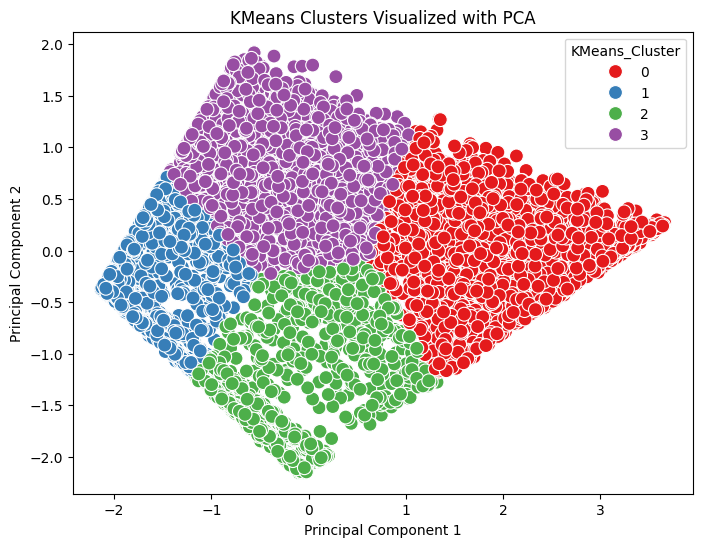

In [101]:
#visualize the clusters in the PCA
plt.figure(figsize = (8, 6))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = df["KMeans_Cluster"], palette = "Set1", s = 100)
plt.title("KMeans Clusters Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [102]:
#silhuoette score for pca
score_pc = silhouette_score(X_pca, df["KMeans_Cluster"])
print(f"Silhouette Score After PCA: {score_pc:.2f}")

Silhouette Score After PCA: 0.47


In [103]:
cluster_analysis = df.groupby("KMeans_Cluster")[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print("\nCluster Analysis (Mean of Numerical Features):")
print(cluster_analysis)


Cluster Analysis (Mean of Numerical Features):
                  tenure  MonthlyCharges  TotalCharges
KMeans_Cluster                                        
0               1.101774        0.944291      1.435414
1              -0.902832       -1.097396     -0.873429
2               0.861443       -0.999835     -0.202083
3              -0.693187        0.530885     -0.456304


Based on the cluster analysis:

Red 0: Customers with high tenure, high monthly charges, and high total charges. Likely long term,high value premium customers.

Blue 1: Customers with low tenure, moderate monthly charges, and low total charges. Likely new customers.

Green 2: Customers with high tenure, moderate monthly charges, and high total charges. loyal long-term customers with moderate spending.

Purple 3: Customers with low tenure, high monthly charges, and moderate total charges. Likely newer customers with higher service usage.


**8️⃣ Business Insights & Recommendations**

*   Summarize what each model learned

*   Recommend actions for the telecom business

**Write your insights and strategies here**

In [104]:
#summarizing what each model learned

**From the EDA**


*   From the plot i can deduce that some services like fiber optic for internet service, month-to-month for contract, electronic check for payment method seems to show very strong churn risk.

*   There is a significant correlation between tenure and totalcharges, it shows that as the tenure increases the totalcharges probably increases with time.

*   For the montlycharges box plot it shows that customers that tend to leave have higher monthly charges compared to the customers that are likely to stay.

*   For total charge box plot the customers that tend to stay have higher total charge while the one that tend to leave have lower total charge. We can deduce that higher monthly charge can pose risk to why customers leave.


**The models**

  **Best Regression Model -- Random Forest Regressor Model**

The model was able to predict the monthly charges with a reasonable accuracy with a good score

**Insights:**


1.   Telco Business will understand the factors that contribute to higher or lower monthlyCharges so as to review its price strategy.
2.   The accurate prediction of the monthly charges will help telco to estimate future sales.
3.   Telco will be able to know the customer group that will likely have a higher monthly charge and plan accordingly.

**Best Classification Model -- Random Forest Classifier(Grid)**

Based on ROC-AUC and F1-score for the positive class (Churn=Yes).

**Insights:**


From the Random Forest classifier (Grid) confusion matrix:

1.  True Negatives (840): Customers correctly predicted to stay.

2.  False Positives (193): Customers incorrectly predicted to churn.

3.  False Negatives (128): Churned customers missed by the model.

4.  True Positives (246): Customers correctly identified as likely to churn.

**From clusters and customer segment**

Based on the cluster analysis:

1. Red 0: Customers with high tenure, high monthly charges, and high total charges. Likely long term,high value premium customers.

2. Blue 1: Customers with low tenure, moderate monthly charges, and low total charges. Likely new customers.

3. Green 2: Customers with high tenure, moderate monthly charges, and high total charges. loyal long-term customers with moderate spending.

4. Purple 3: Customers with low tenure, high monthly charges, and moderate total charges. Likely newer customers with higher service usage.







In [105]:
#Actions for Telco Business

- **Focus on Loyality program for Segment 0 and 2:**

 These are high-value, long-term customers. Implement strong loyalty programs and ensure their satisfaction.

- **Reduce Churn for Segment 1 and 3:**

 By offering a newcommer package, onboarding support, early customer programs.
- **Churn Drive:**

 Offer alternatives, promo or reduced price for services that shows strong churn risk (eg.  fiber optic for internet service, month-to-month for contract, electronic check for payment method)

- **Monitor Customers Progress:**

 Monitor how customers move between segments over time to understand the customer journey and plan ahead.
